**NAME: DINESH J**

**EMAIL: dinesh.j2019@vitstudent.ac.in**

**GRIP**

**DATA SCIENCE AND BUSINESS ANALAYTICS**

**TASK 6**
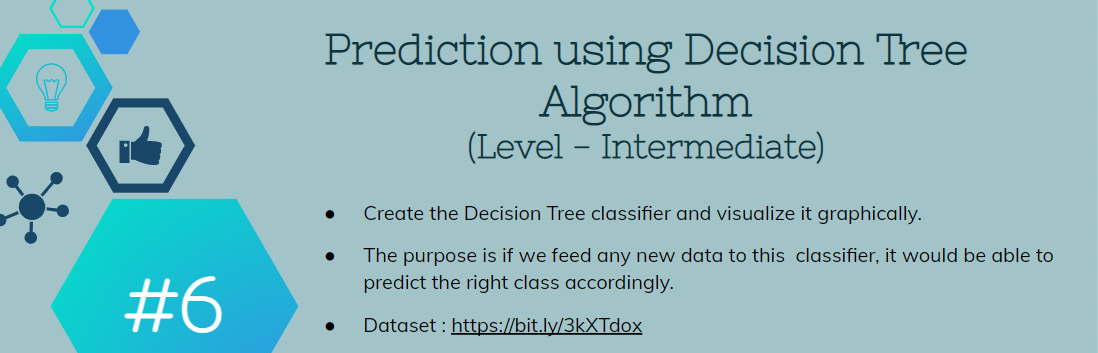



**IMPORTING DATASET**

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [6]:
#To convert into a data frame
import io
df = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))

In [8]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**CLEANING THE DATASET**

In [9]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
df=df.drop(['Id'],axis=1)

In [13]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**THE DATASET IS CLEANED**

**VISUALIZE AND ANALYSIS THE DATASET**

In [20]:
df.shape[0]

150

In [21]:
df.shape[1]

5

In [23]:
np.unique(df['Species'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [24]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


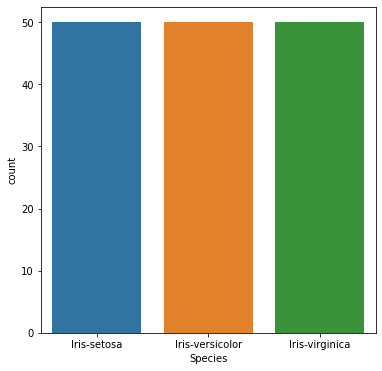

In [25]:
plt.figure(figsize=(6,6))
sns.countplot('Species',data=df)

**CREATING THE DECISION TREE CLASSIFIER**

In [26]:
x=df.drop(['Species'],axis = 1)

In [27]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [28]:
y= df['Species']

In [29]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y , test_size = 0.2,random_state = 3)

In [32]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = "entropy", random_state = 0,max_depth = 9)

In [33]:
tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=0)

**TEST AND TRAIN SCORE FOR THE CREATED DECISION TREE CLASSIFIER**

In [36]:
tree.score(X_test, Y_test)

0.9666666666666667

In [37]:
tree.score(X_train, Y_train)

1.0

**VISUALIZING THE DECISION TREE**

In [41]:
dot_data = StringIO()
export_graphviz(tree, out_file= dot_data, feature_names=list(x.columns),filled = True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

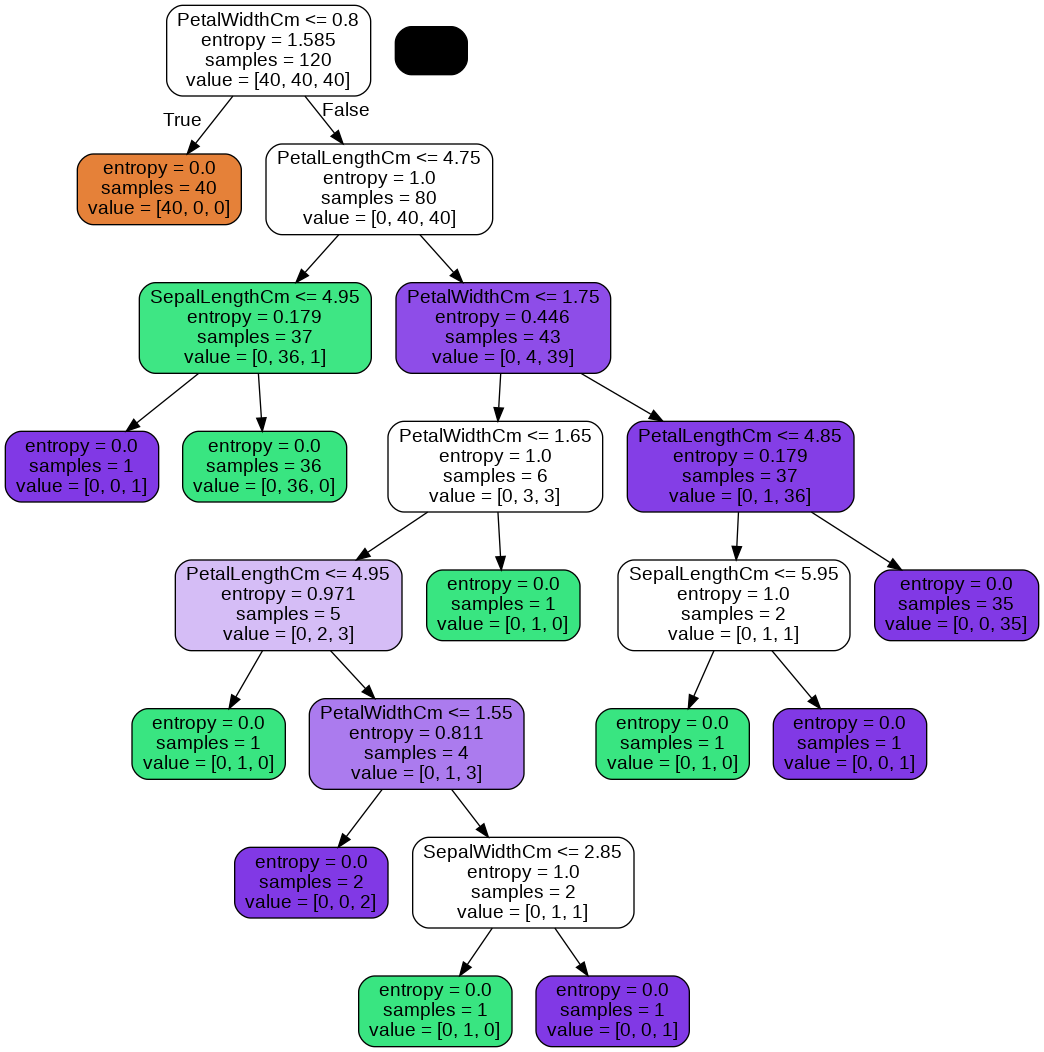

In [42]:
Image(graph.create_png())

**FINAL REPORT OF THE MODEL**

In [34]:
prediction=tree.predict(X_test)

In [35]:
prediction

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

In [44]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
report = classification_report(prediction, Y_test)

In [45]:
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

